<a href="https://colab.research.google.com/github/Gops03/PROSESAMIENTO_DIGITAL_DE_SE-ALES/blob/main/2_2_EnventanadoIANALARCON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Te deja subir el archivo .whl directamente

# Luego, instala el archivo que subiste
!pip install dsp_utils-0.2-py3-none-any.whl


Saving dsp_utils-0.2-py3-none-any.whl to dsp_utils-0.2-py3-none-any.whl
Processing ./dsp_utils-0.2-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.2 MB/s eta 0:00:00


In [2]:
import dsp_utils
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import spectrogram

from dsp_utils.signals.generator import SignalGenerator
from dsp_utils.signals.visualizations import Visualizer

import numpy as np


# Sección nueva

In [3]:
vis = Visualizer(figsize=(16, 7), dpi=100)

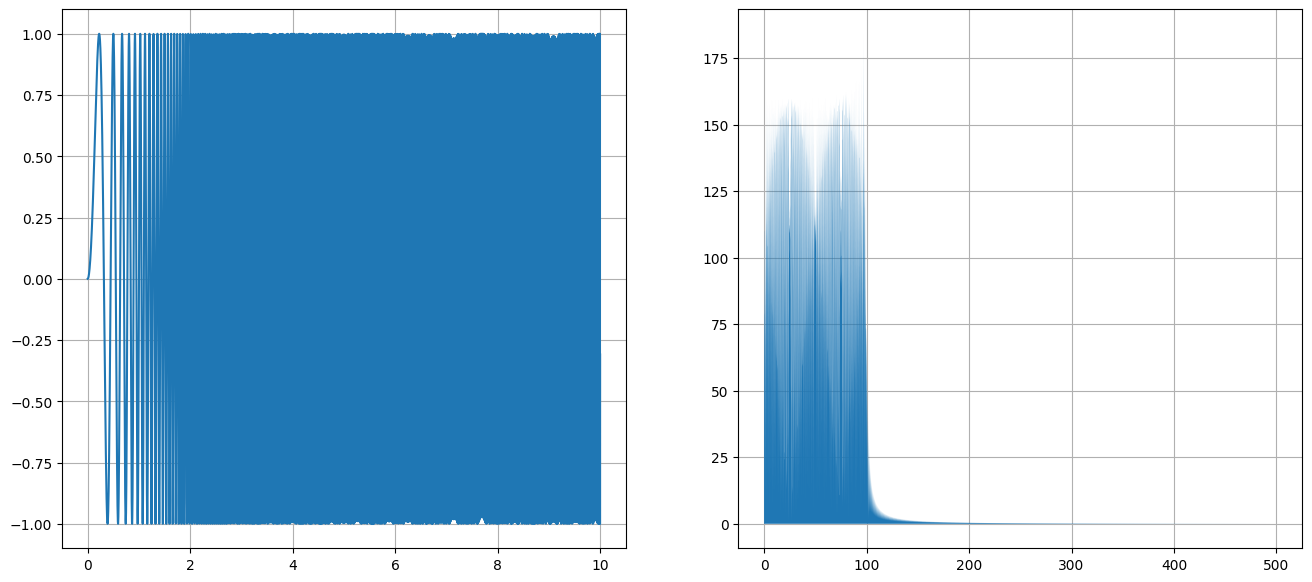

In [4]:
generador = SignalGenerator(frequency=[[0, 50]], amplitude=1, duration=10, sampling_rate=1000)
senal_seno = generador.sine_wave
vis.plot_dsp(senal_seno[0], sample_rate=1000, time=generador.time)

In [10]:
from scipy.signal import welch, spectrogram
from numpy.fft import rfft, rfftfreq
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

N = senal_seno.size
t = generador.time
f = generador.frequency[0]
s = senal_seno[0]
sp = None

@interact(start=(0, t[-1], 0.01), width=(0.1, t[-1]/2, 0.01))
def windowed_fourier(start=0, width=0.5):
    global sp

    plt.figure(figsize=(26, 10), dpi=90)

    window = [start, start + width]

    plt.subplot(321)
    plt.plot(t, s, color='C0', zorder=5)
    plt.fill_between(window, [s.min(), s.min()], [s.max(), s.max()], color='C1', alpha=0.5, zorder=10)
    plt.grid(True, zorder=0)
    plt.title('Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(322)
    sw = s[np.where((window[0] < t) & (t < window[1]))]
    tw = t[np.where((window[0] < t) & (t < window[1]))]

    S = np.abs(rfft(sw))
    W = rfftfreq(len(sw), t[1] - t[0])

    plt.vlines(W, 0, S)
    plt.xlim(0, f[-1] * 2)
    plt.grid(True, zorder=0)
    plt.title('DSP')
    plt.xlabel('Frequency [Hz]')

    sp = np.zeros((len(W), int(len(t) / len(t[t < width]))))
    index = int(sp.shape[1] / (t[-1] / (start + 0.1)))
    print(sp.shape, index)
    sp[:, index] = np.log10(S)

    ax = plt.subplot(312)
    plt.matshow(sp[0:100], aspect='auto', fignum=False)

    ax = plt.subplot(313)
    f_, t_, Sxx = spectrogram(s, fs=1 / t[1], noverlap=0, nperseg=sp.shape[0])
    plt.pcolormesh(t_, f_, np.log10(Sxx))
    plt.ylim([0, 100])
    plt.gca().invert_yaxis()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Espectrograma completo (FFT)')
    plt.show()

    # --------------- ADICIONES -----------------

    # 1. Espectro (FFT) del fragmento
    plt.figure(figsize=(10, 4))
    plt.plot(W, S, color='C2')
    plt.title('Espectro (FFT) del fragmento en ventana')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
    plt.grid()
    plt.xlim([0, 100])
    plt.show()

    # 2. Espectrograma (FFT) del fragmento
    f_seg, t_seg, Sxx_seg = spectrogram(sw, fs=1 / (t[1] - t[0]), nperseg=128, noverlap=64)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t_seg + window[0], f_seg, np.log10(Sxx_seg + 1e-10), shading='gouraud')
    plt.title('Espectrograma del fragmento en ventana (FFT)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.ylim([0, 100])
    plt.colorbar(label='Log Power')
    plt.show()

    # 3. Espectro (Welch) del fragmento
    f_welch, Pxx_welch = welch(sw, fs=1 / (t[1] - t[0]), nperseg=256)
    plt.figure(figsize=(10, 4))
    plt.semilogy(f_welch, Pxx_welch, color='C3')
    plt.title("Espectro (Welch) del fragmento en ventana")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Densidad espectral")
    plt.grid()
    plt.xlim([0, 100])
    plt.show()

    # 4. Espectrograma (Welch) del fragmento
    f_welch_spec, t_welch_spec, Sxx_welch = spectrogram(sw, fs=1 / (t[1] - t[0]), nperseg=256, noverlap=128, scaling='density', mode='psd')
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t_welch_spec + window[0], f_welch_spec, np.log10(Sxx_welch + 1e-10), shading='gouraud')
    plt.title('Espectrograma del fragmento en ventana (Welch)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.ylim([0, 100])
    plt.colorbar(label='Log Power')
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='start', max=9.999, step=0.01), FloatSlider(value=0.5…